In [3]:
import pandas as pd
from pycaret.regression import * 

In [4]:
data = pd.read_csv("/content/drive/MyDrive/pycaret_regression/selected_feature.csv")
data.head()

,a,b,c,d,e,f
0,6.575,4.0900,296.0,15.3,4.98,24.0
1,6.421,4.9671,242.0,17.8,9.14,21.6
2,7.185,4.9671,242.0,17.8,4.03,34.7
3,6.998,6.0622,222.0,18.7,2.94,33.4
4,7.147,6.0622,222.0,18.7,5.33,36.2


In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2)
print("Shape of train is :{} \nShape of test is :{}".format(train.shape, test.shape)) 

Shape of train is :(404, 6) 
Shape of test is :(102, 6)


In [7]:
# Pipeline setup 
set_pipeline = setup(train, target='f') 

,Description,Value
0,session_id,8923
1,Target,f
2,Original Data,"(404, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(282, 5)"


In [8]:
# Creating models 
best_model = compare_models() 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.5746,13.9776,3.6084,0.8382,0.1714,0.1323,0.060
et,Extra Trees Regressor,2.5657,14.9003,3.7114,0.8252,0.1696,0.1291,0.401
lightgbm,Light Gradient Boosting Machine,2.7691,15.6030,3.7629,0.8147,0.1745,0.1394,0.075
rf,Random Forest Regressor,2.6112,15.9622,3.8110,0.8126,0.1731,0.1343,0.461
ada,AdaBoost Regressor,3.0585,17.8359,4.1050,0.7798,0.1958,0.1622,0.079
lr,Linear Regression,3.5190,24.4336,4.8216,0.7234,0.2611,0.1827,0.501
ridge,Ridge Regression,3.5215,24.4172,4.8214,0.7234,0.2600,0.1826,0.013
lar,Least Angle Regression,3.5190,24.4336,4.8216,0.7234,0.2611,0.1827,0.014
br,Bayesian Ridge,3.5325,24.4437,4.8275,0.7228,0.2576,0.1824,0.013
huber,Huber Regressor,3.4188,25.2717,4.8780,0.7167,0.2928,0.1779,0.033


In [13]:
# Creating Gradient Boosted Regression 
base_model = create_model('gbr') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.0118,6.6195,2.5728,0.9170,0.0930,0.0804
1,2.2190,8.7967,2.9659,0.9123,0.1209,0.1011
2,2.3097,9.4099,3.0676,0.8690,0.1700,0.1329
3,3.3053,32.6246,5.7118,0.6968,0.2282,0.1602
4,2.7845,19.2094,4.3829,0.8014,0.1508,0.1168
5,2.7567,10.2814,3.2065,0.8937,0.1566,0.1378
6,3.0606,17.4787,4.1808,0.8336,0.2197,0.1613
7,2.1378,8.1045,2.8468,0.7616,0.1929,0.1557
8,3.0631,20.2189,4.4965,0.7870,0.2276,0.1619
9,2.0977,7.0328,2.6519,0.9092,0.1545,0.1148


In [14]:
# Base model tuning 
tune_base_model = tune_model(base_model) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.6393,3.9713,1.9928,0.9502,0.0766,0.0669
1,2.1472,9.2992,3.0495,0.9073,0.1243,0.0934
2,2.5743,11.3317,3.3663,0.8422,0.1822,0.1444
3,3.5289,39.5272,6.2871,0.6326,0.2389,0.1664
4,2.6671,15.0845,3.8839,0.8441,0.1518,0.1207
5,2.5418,10.5081,3.2416,0.8913,0.1482,0.1226
6,3.0430,16.6796,4.0841,0.8412,0.2053,0.1544
7,2.2771,8.2500,2.8723,0.7573,0.1932,0.1612
8,3.2889,21.9194,4.6818,0.7691,0.2489,0.1803
9,2.4485,8.3700,2.8931,0.8919,0.1452,0.1245


In [15]:
# Details of the base model 
tune_base_model 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=7,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.5, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=110,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=8923, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

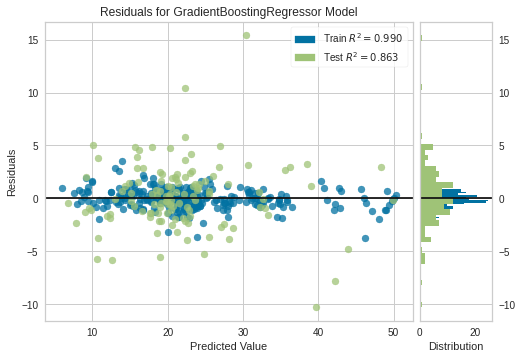

In [25]:
# Residuals of the models 
plot_model(tune_base_model, plot='residuals') 

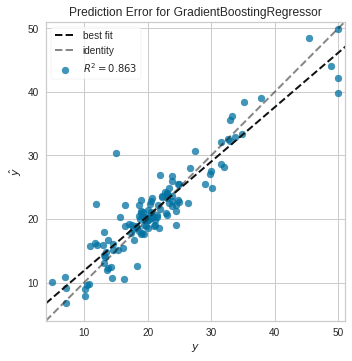

In [17]:
# Errors of the models 
plot_model(tune_base_model, plot = 'error') 

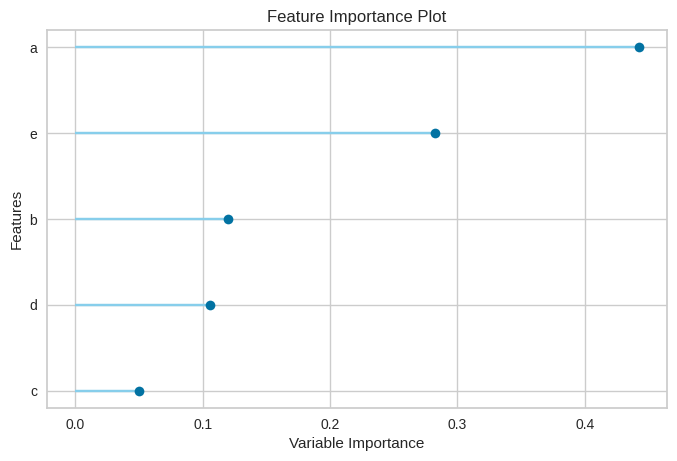

In [18]:
# Feature importtance of the models 
plot_model(tune_base_model, plot = 'feature') 

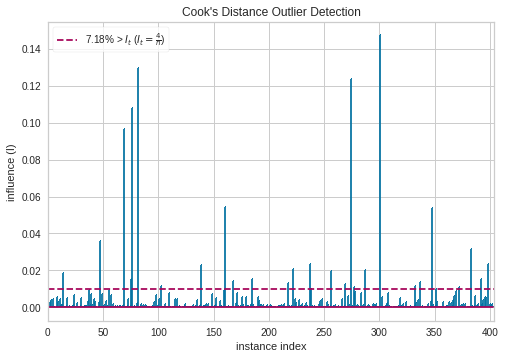

In [23]:
# Cooks Distance Plot 
plot_model(tune_base_model, plot='cooks')

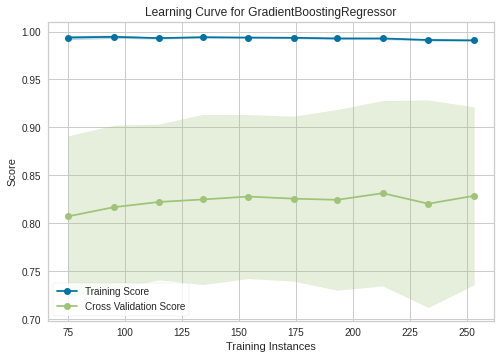

In [22]:
# Learning Curve
plot_model(tune_base_model, plot='learning') 

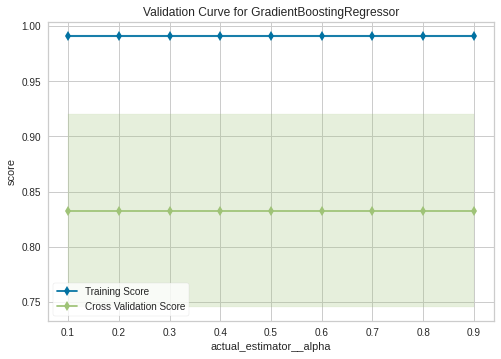

In [21]:
# Validation Curve
plot_model(tune_base_model, plot='vc')

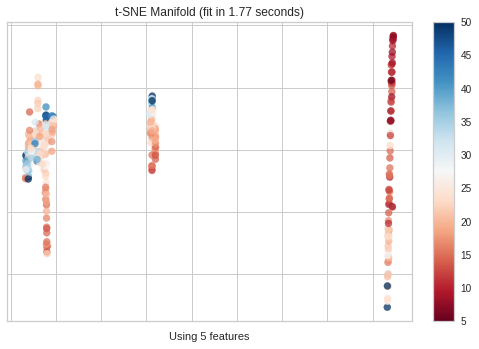

In [20]:
# Manifold Learning
plot_model(tune_base_model, plot='manifold')

In [19]:
# Evaluation of the models 
evaluate_model(tune_base_model) 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predict with test data

In [27]:
# Finalizing models 
finalize = finalize_model(tune_base_model)
print(finalize) 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=7,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.5, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=110,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=8923, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [28]:
# Predicting with the test dataset 
unseen_predictions = predict_model(tune_base_model, data=test)
unseen_predictions.head()

,a,b,c,d,e,f,Label
317,5.782,4.0317,304.0,18.4,15.94,19.8,18.859493
412,4.628,1.5539,666.0,20.2,34.37,17.9,7.749857
296,6.549,5.9604,289.0,16.0,7.39,27.1,24.489093
145,6.130,1.4191,403.0,14.7,27.80,13.8,14.565790
368,4.970,1.3325,666.0,20.2,3.26,50.0,41.067281


# Full Form of the Models 

In [12]:
# Full forms of the models 
model_metadata = models() 
model_metadata['Name'] 

ID
lr                          Linear Regression
lasso                        Lasso Regression
ridge                        Ridge Regression
en                                Elastic Net
lar                    Least Angle Regression
llar             Lasso Least Angle Regression
omp               Orthogonal Matching Pursuit
br                             Bayesian Ridge
ard         Automatic Relevance Determination
par              Passive Aggressive Regressor
ransac                Random Sample Consensus
tr                         TheilSen Regressor
huber                         Huber Regressor
kr                               Kernel Ridge
svm                 Support Vector Regression
knn                     K Neighbors Regressor
dt                    Decision Tree Regressor
rf                    Random Forest Regressor
et                      Extra Trees Regressor
ada                        AdaBoost Regressor
gbr               Gradient Boosting Regressor
mlp                            

# Blending Models

In [29]:
# Five best models 
gbr = create_model('gbr')
et = create_model('et') 
lightgbm = create_model('lightgbm')
rf = create_model('rf')
ada = create_model('ada') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.4965,10.7098,3.2726,0.8657,0.1222,0.1053
1,2.2621,9.4709,3.0775,0.9055,0.1157,0.0971
2,3.3561,18.0931,4.2536,0.7481,0.2356,0.2047
3,3.9108,42.2279,6.4983,0.6075,0.2558,0.1915
4,2.8406,13.3054,3.6477,0.8625,0.1502,0.1275
5,2.9342,12.6437,3.5558,0.8692,0.1872,0.1613
6,3.3050,15.8828,3.9853,0.8488,0.2067,0.1748
7,3.1077,15.3523,3.9182,0.5485,0.2711,0.2454
8,3.6421,28.2126,5.3116,0.7028,0.2483,0.1703
9,2.7294,12.4601,3.5299,0.8391,0.1653,0.1439


In [30]:
gbr_tune = tune_model(gbr, fold=5) 
et_tune = tune_model(et, fold=5) 
lightgbm_tune = tune_model(lightgbm, fold=5) 
rf_tune = tune_model(rf, fold=5) 
ada_tune = tune_model(ada, fold=5) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2813,8.9891,2.9982,0.8993,0.1141,0.0969
1,3.8059,32.6517,5.7142,0.6410,0.2468,0.2003
2,2.8509,13.2402,3.6387,0.8635,0.1612,0.1375
3,2.9510,13.3393,3.6523,0.8246,0.2193,0.1907
4,3.1153,18.9133,4.3489,0.7812,0.2063,0.1540
Mean,3.0009,17.4267,4.0705,0.8019,0.1895,0.1559
SD,0.4907,8.2394,0.9263,0.0896,0.0468,0.0374


In [31]:
blend_specific = blend_models(estimator_list = [gbr_tune, et_tune, lightgbm_tune, rf_tune, ada_tune]) 


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.8186,6.1109,2.4720,0.9234,0.0876,0.0725
1,2.0958,7.7777,2.7889,0.9224,0.1135,0.0920
2,2.7465,13.1469,3.6259,0.8170,0.1938,0.1599
3,3.5388,38.6743,6.2189,0.6405,0.2323,0.1632
4,2.6493,15.5544,3.9439,0.8392,0.1411,0.1135
5,2.7302,10.5647,3.2503,0.8907,0.1646,0.1431
6,2.7124,12.1996,3.4928,0.8838,0.1805,0.1406
7,2.3160,9.1279,3.0212,0.7315,0.2232,0.1855
8,2.8386,17.0781,4.1326,0.8201,0.2140,0.1535
9,2.0637,6.4981,2.5491,0.9161,0.1181,0.1062


In [32]:
finalize_blend = finalize_model(blend_specific)
unseen_predictions = predict_model(finalize_blend, data=test, round=0)
unseen_predictions.head()

,a,b,c,d,e,f,Label
317,5.782,4.0317,304.0,18.4,15.94,19.8,18.706090
412,4.628,1.5539,666.0,20.2,34.37,17.9,10.201795
296,6.549,5.9604,289.0,16.0,7.39,27.1,25.684952
145,6.130,1.4191,403.0,14.7,27.80,13.8,14.269072
368,4.970,1.3325,666.0,20.2,3.26,50.0,37.854535


# Stacking Models

In [33]:
# Five best models 
gbr = create_model('gbr')
et = create_model('et') 
lightgbm = create_model('lightgbm')
rf = create_model('rf')
ada = create_model('ada') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.4965,10.7098,3.2726,0.8657,0.1222,0.1053
1,2.2621,9.4709,3.0775,0.9055,0.1157,0.0971
2,3.3561,18.0931,4.2536,0.7481,0.2356,0.2047
3,3.9108,42.2279,6.4983,0.6075,0.2558,0.1915
4,2.8406,13.3054,3.6477,0.8625,0.1502,0.1275
5,2.9342,12.6437,3.5558,0.8692,0.1872,0.1613
6,3.3050,15.8828,3.9853,0.8488,0.2067,0.1748
7,3.1077,15.3523,3.9182,0.5485,0.2711,0.2454
8,3.6421,28.2126,5.3116,0.7028,0.2483,0.1703
9,2.7294,12.4601,3.5299,0.8391,0.1653,0.1439


In [34]:
gbr_tune = tune_model(gbr, fold=5) 
et_tune = tune_model(et, fold=5) 
lightgbm_tune = tune_model(lightgbm, fold=5) 
rf_tune = tune_model(rf, fold=5) 
ada_tune = tune_model(ada, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2813,8.9891,2.9982,0.8993,0.1141,0.0969
1,3.8059,32.6517,5.7142,0.6410,0.2468,0.2003
2,2.8509,13.2402,3.6387,0.8635,0.1612,0.1375
3,2.9510,13.3393,3.6523,0.8246,0.2193,0.1907
4,3.1153,18.9133,4.3489,0.7812,0.2063,0.1540
Mean,3.0009,17.4267,4.0705,0.8019,0.1895,0.1559
SD,0.4907,8.2394,0.9263,0.0896,0.0468,0.0374


In [35]:
stack_1 = stack_models(estimator_list=[gbr_tune, et_tune, lightgbm_tune, rf_tune, ada_tune]) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.7453,4.7614,2.1821,0.9403,0.0828,0.0722
1,2.1447,8.6176,2.9356,0.9141,0.1264,0.0970
2,2.8697,14.2156,3.7704,0.8021,0.1985,0.1626
3,3.2868,34.3021,5.8568,0.6812,0.2249,0.1549
4,2.5224,15.8140,3.9767,0.8365,0.1361,0.1060
5,2.6607,10.2428,3.2004,0.8941,0.1552,0.1318
6,2.7090,13.6465,3.6941,0.8700,0.1881,0.1365
7,2.2786,9.6525,3.1069,0.7161,0.2204,0.1747
8,2.7709,17.4768,4.1805,0.8159,0.2161,0.1497
9,1.9453,6.4860,2.5468,0.9163,0.1045,0.0933


In [36]:
finalize_stack = finalize_model(stack_1)
unseen_predictions = predict_model(finalize_stack, data=test, round=0)
unseen_predictions.head()

,a,b,c,d,e,f,Label
317,5.782,4.0317,304.0,18.4,15.94,19.8,18.382582
412,4.628,1.5539,666.0,20.2,34.37,17.9,9.625562
296,6.549,5.9604,289.0,16.0,7.39,27.1,25.910988
145,6.130,1.4191,403.0,14.7,27.80,13.8,11.052871
368,4.970,1.3325,666.0,20.2,3.26,50.0,41.804914
